In [1]:
import pickle
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
# Loading the predictions for kNN Classifier
with open('predictions_kNN.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
    pred1  = loaded_data  


In [2]:
# Loading the predictions for kNN Classifier
with open('predictions_kNN_eng.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
    pred1_eng  = loaded_data  


In [3]:
# Loading the predictions for RNN Classifier
with open('predictions_RNN_eng.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
    pred2_eng = loaded_data  


In [31]:
# Loading the predictions for RNN Classifier
with open('predictions_RNN.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
    pred2 = loaded_data  


In [6]:
# Loading the predictions for kNN Classifier
with open('true_class.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
    true_class_pre  = loaded_data  


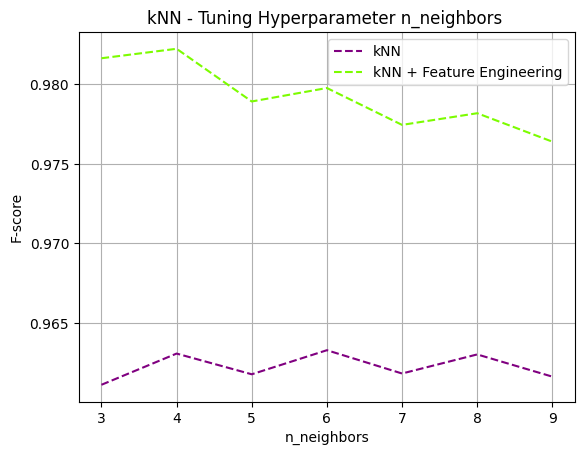

In [41]:
n_neighbors_values = range(3,10)
#plt.scatter(n_neighbors_values,f1_list, color='purple', marker='x')
plt.plot(n_neighbors_values, f_scores_eng[:7], '--', color='purple', label='kNN')
plt.plot(n_neighbors_values, f_scores_no_eng, '--', color='lawngreen', label='kNN + Feature Engineering')
plt.grid()
plt.title('kNN - Tuning Hyperparameter n_neighbors ')
plt.xlabel('n_neighbors')
plt.ylabel('F-score')
plt.legend()

In [4]:
class_pred1 = np.argmax(pred1_eng, axis=1)
class_pred2 = np.argmax(pred2_eng, axis=1)

In [7]:
# Define table as a 2x2 numpy array
from scipy.stats import binom
table = np.zeros((2,2))


# Compute elements of table

# both classifiers are correct
table[0][0] = np.sum((class_pred1 == true_class ) & (class_pred2 == true_class))
# classifier 1 is correct but classifier 2 is not
table[0][1] = np.sum((class_pred1 == true_class ) & (class_pred2 != true_class))
#  classifier 2 is correct but classifier 1 is not
table[1][0] = np.sum((class_pred1 != true_class ) & (class_pred2 == true_class))
# both classifiers are incorrect
table[1][1] = np.sum((class_pred1 != true_class ) & (class_pred2 != true_class))
print(table)

# Extract false positives and true negatives values 
N_2_1 = table[1][0]
print(N_2_1)
N_1_2 = table[0][1]
print(N_1_2)

# Computing number of times one classifier only was correct
N = N_1_2 + N_2_1

# Define binomial random variable
b = binom(N, 0.5)


# Compute p-value
pval =  b.cdf(min(N_1_2,N_2_1)) + (1-b.cdf(max(N_1_2,N_2_1)-1)) 
print('p-value is', pval)

[[213418.   3338.]
 [  4925. 215102.]]
4925.0
3338.0
p-value is 6.958562863732718e-69
